<h1 align="center">Advanced Linear Regression </h1>


# Program so far 
***
* Introduction to Python - You are now a budding pythonista

* Introduction to Machine Learning - You can distinguish a classification task from a clustering task

* Basic Probability & Descriptive Stats - You are at peace with Statistics

* Steps involved in solving an end-to-end ML problem - One Step Closer to Machine Learning

# Agenda for the Day
***
- Shortcomings of linear regression
- Polynomial Basis Function
- Regularization(L1/L2)
- Bias-variance trade-off

## What are we going to learn today ?
***
- Exposure to outliers
- Outliers
	- Fitting  random line on the data
	- Adding First Outlier
	- Adding Second Outlier
	- Plotting all lines at once
	- Conclusion
- What apart from Outliers
- Underfitting
- Polynomial Regression - Introduction
- Polynomial Basis Function - Mathematical Representation
- What is a Polynomial Feature Transformer?
- Overfitting - Intuition
- Concept of Regularization
	- L1 Regularization (also called as Lasso penalisation)
		- Understanding L1
		- Lasso - Implementation in Python
	- L2 Regularization (also called as Ridge penalisation) 
		- L2 Regularization
		- L2 Regularization - Python Implementation
	- L1 vs L2 Regularization
	- Ridge or Lasso ?
    - ElasticNet Regression
        - ElasticNet Regression - Mathematical Implementation
        - ElasticNet - How does it work ?
- Bias-Variance Trade-off
- Model Validation
	- Cross-validation
	- Validation through Holdout Set
	- Model validation through k-fold validation
	- Hold-one-out (also known as Leave-one-out validation)



In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

- Till now we have learnt to fit a simple linear regression model and we have done this on the house-price prediction dataset.
- We have predicted the Price of a House given its Area 
- However, with further analysis, these predictions can be improved!

## Exposure to Outliers
***
* What if there are houses that are having prices way away from the regression line? Aren't these outliers? 
 
* **What happens when the model is exposed to outliers ?** 
 
* **Does this model prove to be good enough in examining the relationship between a dependent variable and independent variable?**

Let's see what happens to our model when we expose it to outliers. 
## Outliers
* We learnt about **outliers** in Descriptive Statistics. Lets intuitively understand what they are, quickly
* What do you infer by looking at the image below?

* The data point far away from the 'model' is basically an *Outlier*

![](../images/Outliers.png)
<br/>
Image Source : https://www.itrcweb.org/gsmc-1/Content/GW%20Stats/5%20Methods%20in%20indiv%20Topics/5%2010%20%20Identification%20of%20Outliers.htm

### Mini-Experiment

* In order to understand more about outliers, let's genrate some random data points with our python skills and plot it out

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(9)

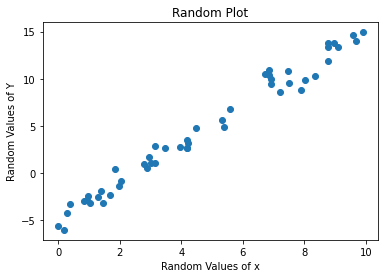

In [3]:
rng = np.random.RandomState(1)
x1 = 10 * rng.rand(50)
y1 = 2 * x1 - 5 + rng.randn(50)
plt.scatter(x1, y1);
plt.xlabel("Random Values of x")
plt.ylabel("Random Values of Y")
plt.title("Random Plot");

## Fitting a line on the random data

* Now let's fit a linear regression model on the data and see how it fits

model coeff: 2.03
model intercept: -5.00


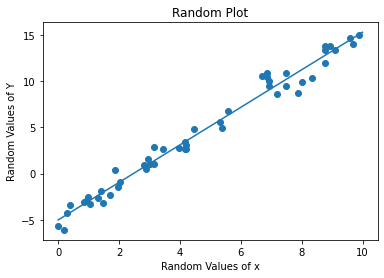

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x1[:, np.newaxis], y1)

xfit1 = np.linspace(0, 10, 50)
yfit1 = model.predict(xfit1[:, np.newaxis])
print ("model coeff: {0:.2f}".format(model.coef_[0]))
print ("model intercept: {0:.2f}".format(model.intercept_))

plt.scatter(x1, y1)
plt.plot(xfit1, yfit1);
plt.xlabel("Random Values of x")
plt.ylabel("Random Values of Y")
plt.title("Random Plot");

* The Linear regression model fits well to the data we generated randomly. And we get the regression equation to be:

$$ y = -5.00 \beta_0 + 2.03 \beta_1 $$





## Introducing Outliers
***
* Now let's introduce some outliers into the data

## Adding First Outlier

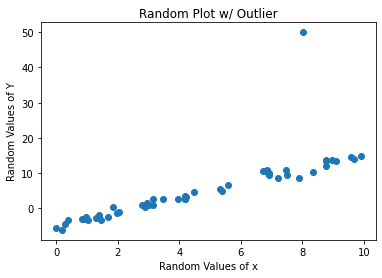

In [5]:
###Adding first outlier
rng = np.random.RandomState(1)
x2 = 10 * rng.rand(50)
y2 = 2 * x2 - 5 + rng.randn(50)
y2[20] = 50 # Outlier added
plt.scatter(x2, y2)
plt.xlabel("Random Values of x")
plt.ylabel("Random Values of Y")
plt.title("Random Plot w/ Outlier");

Now, let's use our skills to fit a model through our new data points and then plot the "best-fitting" line:

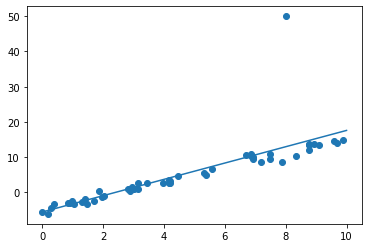

In [6]:
model = LinearRegression(fit_intercept=True)
model.fit(x2[:,np.newaxis],y2)
yfit2 = model.predict(xfit1[:,np.newaxis])
plt.scatter(x2,y2)
plt.plot(xfit1,yfit2);

Observe how the line tends to shift towards the outliers

## Adding a second Outlier 

- Now, let's double the fun by adding a second outlier and fitting the same model and then see how the regression line changes.

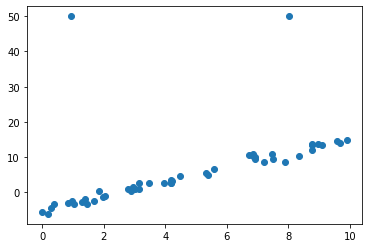

In [7]:
#Adding second outlier
rng = np.random.RandomState(1)
x3 = 10 * rng.rand(50)
y3 = 2 * x3 - 5 + rng.randn(50)
y3[20] = 50
y3[5] = 50
plt.scatter(x3, y3);

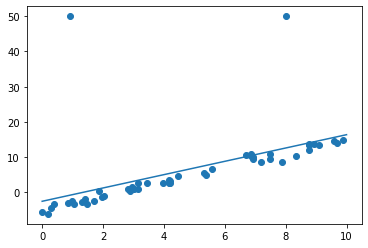

In [8]:
# Your Code here
model.fit(x3[:,np.newaxis],y3)
yfit3 = model.predict(xfit1[:,np.newaxis])
plt.scatter(x3,y3)
plt.plot(xfit1,yfit3);

## Plotting all lines at once
***
Now let's see how our models look if put together.

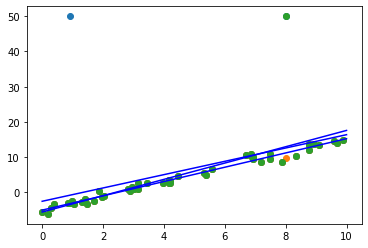

In [9]:
plt.scatter(x3, y3);
plt.scatter(x1, y1)
plt.scatter(x2, y2)


plt.plot(xfit1, yfit1, "b");
plt.plot(xfit1, yfit2, "b");
plt.plot(xfit1, yfit3, "b");

**Plotting three lines** it can be seen that all the three lines vary from each other significantly.

`Verdict`: A single outlier can significantly change the model parameters.



## Conclusion 

* After this exercise, we know what outliers could do to linear regression model

* How are the linear model parameters changed by introducing outliers?

* As we have already studied, one of the assumptions of linear regression, is that linear models are sensitive to outliers. 


## What apart from Outliers?
***
**Apart from outliers, we need to check for the correlation between data points**

* We studied this in Descriptive Stats and EDA and should be using it in this case, for better predictions

* Linear correlation refers to straight-line relationships between two variables. In univariate linear regression, we have only 1 predictor so Correlation is not really something to worry about! 

* **Remember**: But, for Multivariate Linear Regresssion, as in our housing data we have 78 columns in total! Now, since our final analysis contains all these predictor variables, we must check for this as well. 


### Mini Experiment

* Let's consider a toy dataset with 2 variables which are **not** linearly related and checked how our model will behave and predict.

* The data is generated in the below figure by adding noise to a *sin wave function*


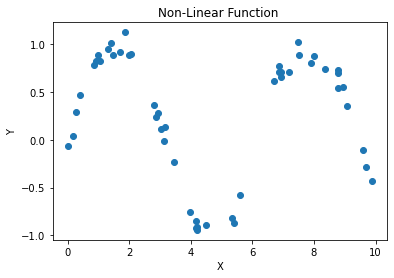

In [10]:
## Defining sinusodial relationship between x and y

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

plt.scatter(x, y);
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-Linear Function ");

* It is evident that a linear model will not be able to fit the data points properly. Still, let's go ahead and try to fit a linear regression model and see what happens




model coeff: 1.8891763347334054
model intercept: -2.4930703201749926


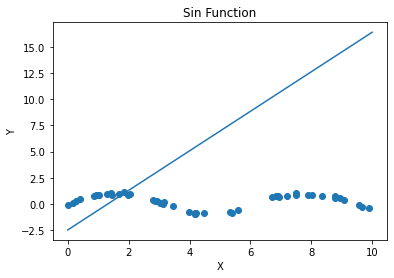

In [11]:
# Fit your linear regression here

xfit1 = np.linspace(0, 10, 1000)
yfit1 = model.predict(xfit1[:, np.newaxis])
print( "model coeff:", model.coef_[0])
print ("model intercept:", model.intercept_)

plt.scatter(x, y)
plt.plot(xfit1, yfit1);
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sin Function");

As expected, the linear model does an extremely poor job of explaining the target variable. Hence, fitting a linear line to such a nonlinear data *oversimplifies* the model.

This is known as **underfitting**

 - Let's try and understand what underfitting is

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/><br/>

## Underfitting
***

Underfitting is when the the model *fails to capture the overall 'trend' of the data.*

A model that underfits is said to have **high bias.**

- Bias is the difference between predictions and truths using models trained by specific learning algorithm

- Error due to bias is because we assumed that simple linear model will fit a non linear data distribution  while specifying the  algorithm

- Basically, we are biased toward the data having a linear trend and we hypothesize that our target variable increases linearly EVEN THOUGH WE CAN SEE A CLEAR NON-LINEAR TREND 



## What is the issue here?

A linear model is not able to fit the non-linear data. 

- But then can a non-linear curve do the job?



<img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/><br />

## Polynomial Regression - Introduction
***


* One way to tackle underfitting is through polynomial functions. Let's see the implementation of this technique.


<img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/><br/>

## Polynomial Basis Function - Mathematical Representation
***

* In many settings, such a linear relationship may not hold. For example, if we are modeling the yield of a chemical synthesis in terms of the temperature at which the synthesis takes place, we may find that the yield improves by increasing amounts for each unit increase in temperature. In this case, we might propose a quadratic model of the form
    $$ y = \beta_{0}+\beta_{1}x+\beta_{2}x^2+\varepsilon. $$
<br/>
* In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model
    $$ y = \beta_{0}+\beta_{1}x+\beta_{2}x^2+\cdots +\beta_{n}x^n+\varepsilon. $$
<br/>
the above is what is known as **polynomial basis function**  
 <br/>
* Polynomial projection is built into Scikit-Learn, using the ``Polynomial Features`` transformer:

## What is a Polynomial Feature Transformer? 

 - This is nothing but taking the *n-th* degree of your variable
 - Below is an easy example to display what it does
     - Say we wanted to take the 1st, 2nd and 3rd degree of the numbers 2,3 & 4. 
     - Intuitively we know that for 2 the 1st, 2nd and 3rd degrees are: 2, 4 $(2^2)$ and 8 $(2^3)$
 
 - Let's try and understand the code below: 

In [12]:
#code to improvise polynomial regression model and increase the accuracy 

from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Here the 3 in "PolynomialFeatures(3, include_bias=False)" is basically the value of degree of the polynomials up to which we want our data to be transformed to 

- We can see 3 values for 2,3 and 4. For example: $4^1$ (4), $4^2$ (16) and $4^3$ (64)

**Now, let's use the same technique to create a 7th-degree polynomial model for the non-linear data generated  earlier **

In [13]:
#make_pipeline() just like Pipeline() is used to perform a sequence of different transformations on a raw dataset before applying the final estimator. 

from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())  

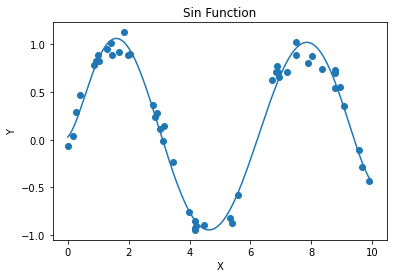

In [14]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sin Function");

7th-order polynomial basis function can provide an excellent fit to this non-linear data.

There are many advantages of using Polynomial Regression as-
-  Broad range of functions can be fit over model
-  Polynomial function fits a wide range of curvature 
-  It provides a good approximation of the relationship and makes the transformation more interpretable.

## Side-tracking

** Let's take it 11 steps further and add an 18 degree polynomial feature **

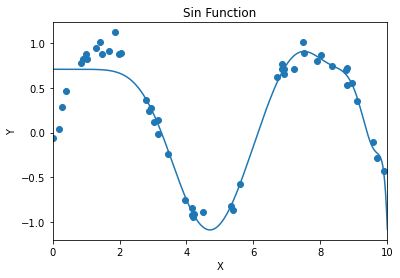

In [15]:
# adding a 18th degree polynomial feature

higher_polynomial = make_pipeline(PolynomialFeatures(18),
                            LinearRegression())
higher_polynomial.fit(x[:, np.newaxis], y)
yfit = higher_polynomial.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sin Function");

## Important Concept

**In the plot below, we can see how the model fits almost all the data points exactly if we introduce further higher degree polynomials **

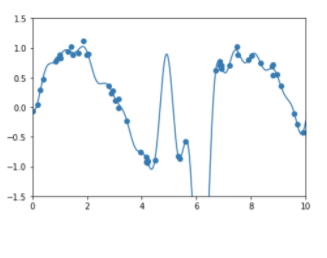

## What happens when we do this ?

Above, it seems like the model is learning `too much` from the data

*Not only is it learning the legit data but also the **noise.***

Such a model is said to be **overfitting** the data.

 - Let's try and understand what Overfitting is and how this applies to our example? 
 


<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/><br/>

## Overfitting - Intuition
***

Overfitting occurs when your model follows the training dataset very rigorously i.e it gives low training error, but it may not work well on generalized or test dataset i.e. it may give a high generalization error. 

For example- It's like a person cramming word to word from a book while studying for his exams. If the questions in the test are straight as in the book, he will do well, else if the questions are more based on usage of multiple concepts outlined in the book he studied, and not directy stated, the person may struggle.

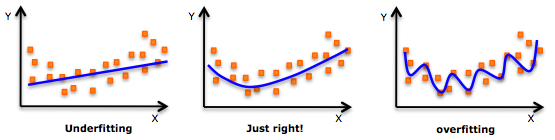<br/>
Image Source : https://www.digitalvidya.com/blog/cross-validation-in-machine-learning/
<br/><br/>
An overfitting model is said to have high variance.

We will discuss about bias and variance soon.

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

## Concept of Regularization
***

<br/>

Regularizations techniques are used to reduce the error by fitting a function appropriately on the given training set to avoid overfitting.
Let's build an intuition with the help of an example 
 

* Let's say a parent is very cautious about the future of his children 
* He wants them to be successful in life without being strict with them. He takes a decision about how much flexibility should be given to his children during their upbringing. 
* *Too much restriction may suppress their development of character*



** Alternatively ** 
- Too much flexibility may spoil them. 
***
- He decides to overcome this situation with the idea of regularized(regularization) flexibility, which is to give enough flexibility added with some restrictions. 
- He can do this by fulfilling some of the expectations of his kids,

**like ** 
- comic books, drawing setups, 
- storytelling, chocolate, 
- ice cream, 
- mobile game etc. to make them happy. 

** But ** 
added some regularization like:

- You have to finish your homework as well
- "Distribute chocolate equally with your sister"
- Checks exam tests, curfew, etc. 

** This is an example of a real life situation, just to build some intuition! Let's see what happens mathematically**


The overfitting behaviour occurs when basis functions overlap:
- The coefficients of adjacent basis functions grow large and cancel each other out.
- We need to limit such spikes explicitly in the model by penalizing large values of the model parameters (the thetas of variables)
- Such a penalty is known as regularization.

It can be done in three ways -
-  L1 Regularization (also called as Lasso Penalization/Regression)
-  L2 Regularization (also called as Ridge Penalization/Regression)
-  Elastic-net

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

# L1 Regularization (also called as Lasso penalisation)
***
<br />
Involves penalising sum of absolute values (1-norms) of regression coefficients<br/>
Here the Penalty (P) on the model will be:
$$ P=\alpha\sum_{i=1}^{n}\left | \theta_{n} \right | $$
<br/>

And the cost function would be:<br/>
$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}x^{(i)}-y^{(i)})^2 + \alpha\sum_{n=1}^{N}\left | \theta_{n} \right | $$


## Understanding L1

 - Here we are familiar with the First half of the Cost Function. 
 
 - By adding all thetas to the cost function, which we want to minimize, we're adding further restrictions on these parameters
 
 - Notice how $\theta_{0}$ is not in the formula for P as the limits start from i=1 to i=n there, as we're not penalizing our Intercept

## Lasso - Implementation in Python

- The  α  parameter in Lasso tunes the strength of the penalty, and should be determined via cross-validation. (What is cross-validation? Later below)

- Let's use Lasso on our model and see how it performs 

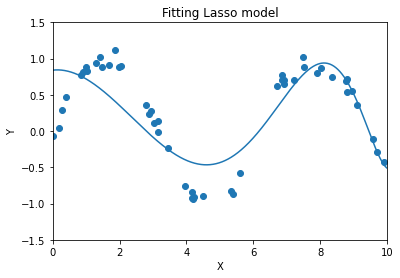

In [16]:
from sklearn.linear_model import Lasso
model_1 = make_pipeline(PolynomialFeatures(15), Lasso(alpha=0.01))
model_1.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model_1.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitting Lasso model");

## But what if ?

- Taking an example, our model has 100 coefficients but only 10 of them have non-zero coefficients, this is effectively saying that “ the other 90 predictors are useless in predicting the target values ”.
- Though this is conceptually very similar to ridge regression(we will see in later slides), the results can differ surprisingly. For example, due to geometric reasons **lasso regression tends to favor sparse models**

- A sparse matrix is a matrix with a **LOT OF 0's**

- That is, it preferentially sets model coefficients to exactly zero!


<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

# L2 Regularization (also called as Ridge penalisation) 
***
<br />
This proceeds by penalising the sum of squares (2-norms) of the model coefficients<br/>
Here the Penalty (P) on the model will be:
$$ P=\alpha\sum_{i=1}^{n}\theta_{n}^{2}  $$
<br/>
And the cost function would be:<br/>
$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}x^{(i)}-y^{(i)})^2 + \alpha\sum_{n=1}^{N} \theta_{n}^{2} $$




## L2 Regularization

- The L2 regularization will force the parameters to be relatively small, the bigger the penalization, the smaller (and the more robust to overfitting) the coefficients are
- Here we are considering every feature but we are penalizing the coefficients based on how significant the feature is

Here,  α is a hyper-parameter that controls the strength of the penalty.
The  α parameter controls complexity of the resulting model.
- In the limit  α→0 , we recover the standard linear regression result.
- In the limit  α→∞ , all model responses will be suppressed.

Ridge regression can be computed very efficiently at hardly any computational cost than the original linear regression model.
This type of penalized model is built into Scikit-Learn with the Ridge estimator.



## L2 Regularization - Python Implementation
***
- Let's see how to implement this and get our coefficients 

Text(0.5, 1.0, 'Fitting Ridge model')

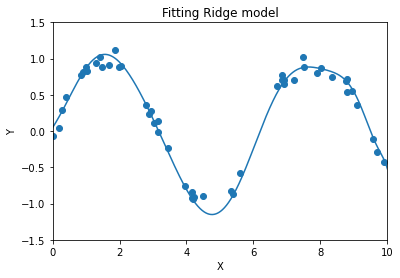

In [17]:
#code to implement Ridge Regression. 
from sklearn.linear_model import Ridge
model_2 = make_pipeline(PolynomialFeatures(16), Ridge(alpha=0.1))# Note we have used a different value of alpha than in Lasso
model_2.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model_2.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitting Ridge model")

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

## L1 vs L2 Regularization
***
<br />
* **Built-in feature selection**

* As we keep increasing the value of alpha, the coefficients keep approaching zero rather quickly, 

**but ** 
* in case of lasso, even at smaller alpha's, our coefficients are reduce to absolute zeros. 

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

## L1 vs L2 Regularization
***
<br />
** Therefore **, 
* Lasso Regression technique selects only some feature while it reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

- A result of this, we tend to get a lot of 0s! 
- This doesn't necessarily happen in case of L2 - Ridge Regression

## Summary
***
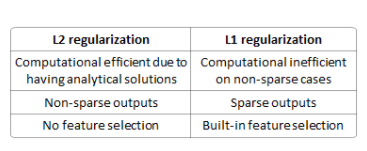

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/><br/>

## Ridge or Lasso ?
***


* Let's say we have a large dataset which has 10,000 features. 
* And some of the independent features are correlated with other independent features. 

**Which one would suit better, Rigde or Lasso?**




* If we apply **ridge regression** to it, it will retain all of the features but will **shrink the coefficients**. Still the problem is that model will remain complex as there are 10,000 features, thus may lead to poor model performance.

* If we apply **lasso regression** to this problem, the main problem will be when we have correlated variables, it would retain only one variable and set other correlated variables to zero. 
* That will possibly lead to some loss of information resulting in lower accuracy in our model.



** Then what is the solution for this problem? ** 
* For this we have another type of regression, known as 

# ElasticNet regression

* which is basically a hybrid of ridge and lasso regression. So let's try to understand it

<img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>

## Elastic-net Regression - Mathematical Implementation
***
<br />

Elastic Net regularization is the combination of both L1 and L2 regulrization having the Penalty(P) as:


$$P = \alpha \displaystyle\sum^{N}_{n=1}{|\theta_n|} + (1 -\alpha) \displaystyle\sum^{N}_{n=1}{\theta_n^2}$$

* Elastic Net generally seems to perform better than both the individual L1 and L2 regularizations. 
* However, it is computationally more expensive

## How does ElasticNet work?
***

* So let's say, we have a bunch of correlated independent variables in a dataset, 
* Then ElasticNet will simply form a group consisting of these correlated variables. 
* Now if any one of the variable of this group is a strong predictor (meaning having a strong relationship with dependent variable), then we will include the entire group in the model building, 
* Because omitting other variables (like what we did in lasso) might result in losing some information in terms of interpretation ability, leading to a poor model performance. So it results out as a trade-off balance between bias and variance by manipulating the  $\alpha$  which improves the model performance and reduces complexity.

 - Let's check how Elastic Net does. 
 - As done earlier, we'll check the coefficients and a plot to see the trend in the coefficients 

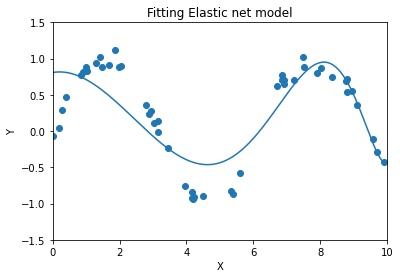

In [18]:
#code to implement ElasticNet
from sklearn.linear_model import ElasticNet
model_3 = make_pipeline(PolynomialFeatures(16), ElasticNet(alpha=1e-7))
model_3.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model_3.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitting Elastic net model");

[ 0.00000000e+00  8.17475348e-02 -2.01133215e-01  2.18404770e-02
  1.21758217e-03  1.26013432e-05 -4.51928027e-06 -6.31355302e-07
 -5.90524436e-08 -4.53182142e-09 -2.89325397e-10 -1.33629604e-11
 -5.77829739e-15  1.05943941e-13  1.87141952e-14  2.46335124e-15
  2.87423490e-16]


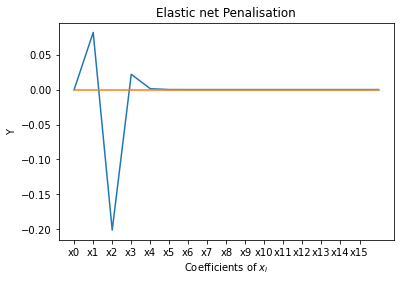

In [19]:
#graph to show improvisation of elastic net 
coef = model_3.steps[1][1].coef_
plt.plot(range(len(coef)), coef);
plt.plot(range(len(coef)), [0]*len(coef))
plt.xticks(range(16),('x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15'))
plt.xlabel("Coefficients of $x_i$")
plt.ylabel("Y")
plt.title('Elastic net Penalisation')

print(coef)

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px; float:left; margin-right:15px"/>


## Bias - Variance -Trade off
***
<br />

* Whenever we fit a model to a data, we can notice two properties; bias, giving us a some kind of measure on the model’s predictions’ average closeness to training data and variance, deviation of the predictions by John's model from the original data.

*  If we fit a model with a low complexity, it will not follow the real trend in the data and our model introduces high bias.

* This high bias in our model will not be able to follow the real trend in data and will produce predictions that are closer to our other predictions resulting in low variance.


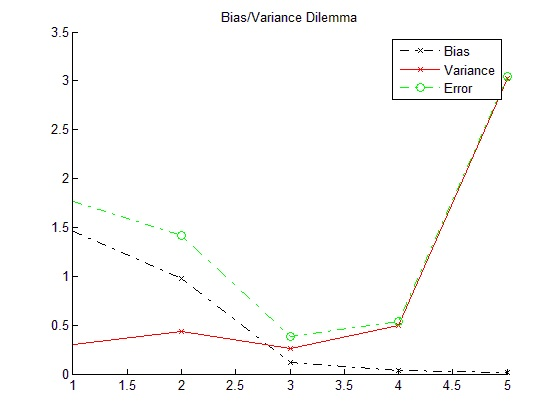

* Lets's look at a technique that helps tackle bias-variance tradeoff better.

* What if we took a small part of our data to test the model (or use it to validate the effectiveness of the model) and train the model on the rest of the data? 

 - This would surely give a good idea on how it's performing since we already know the output of those rows used to test the model 
 
* Here we have  insinuated to use Cross Validation which helps to tackle  overfitting and underfitting as well as Bias - Variance -Trade off.

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px; float:left; margin-right:15px"/> 

## Model Validation:
***
<br /> 
 
 
- Cross-Validation is another technique that helps tackle the issue of overfitting
- Validation is a technique which involves reserving a particular sample of a data set on which you do not train the model.
- Later, you test the model on this sample before finalizing the model (model validation)

## Cross-validation
***
Keeping a validation set aside helps check overfitting on the training set, as the overfitted model will give high performance on the training set but will perform poorly on the validation set.
This helps in measuring the model's ability to generalise


- **NOTE** : WE ARE GOING TO PERFORM CROSS-VALIDATION AND L1/L2 REGULARIZATION ON THE ENTIRE DATA SET (HOUSE-PRICE PREDICTION DATASET)

**Methods for model validation:**
- Holdout sets
- Cross-validation
    - k-fold validation
- Hold-one-out (also known as Leave-one-out validation)


**Holdout sets**
- We keep a seperate portion of train data for validation.
- The data used to train the model is known as “Training set”
- The data used to validate the model is known as “Validation set”
  `sklearn's` cross_validation provides **`train_test_split`** api

<img src="../images/icon/Technical-Stuff.png" alt="Technical_Stuff" style="width: 100px;float:left; margin-right:15px"/> 

## Validation through Holdout Set
***
<br/>
Let's see how to do this in Python. This is going to be interesting so please pay close attention! Use Lasso/Ridge as exercise where the other is not implemented 

 - Time Complexity of the Algorithm would be different for each method so it's normal if one method takes more time than the other! 

In [20]:
import pandas as pd
data = pd.read_csv("../data/house_prices_multivariate.csv")
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


In [21]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data['SalePrice']

# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, train_size=0.5)

In [22]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mean_squared_error(y_test, y_pred)

1498110701.9796908

In [23]:
lasso_model=Lasso(alpha=140, max_iter=100000, random_state=9)

# fit the model on one set of data
lasso_model.fit(X_train, y_train)

# evaluate the model on the second set of data
y_pred = lasso_model.predict(X_test)
mean_squared_error(y_test, y_pred)

1495556945.8879926

In [24]:
ridge_model=Ridge(alpha=0.00001, max_iter=100000, random_state=9)

# fit the model on one set of data
ridge_model.fit(X_train, y_train)

# evaluate the model on the second set of data
y_pred = ridge_model.predict(X_test)
mean_squared_error(y_test, y_pred)

1498110703.1693778

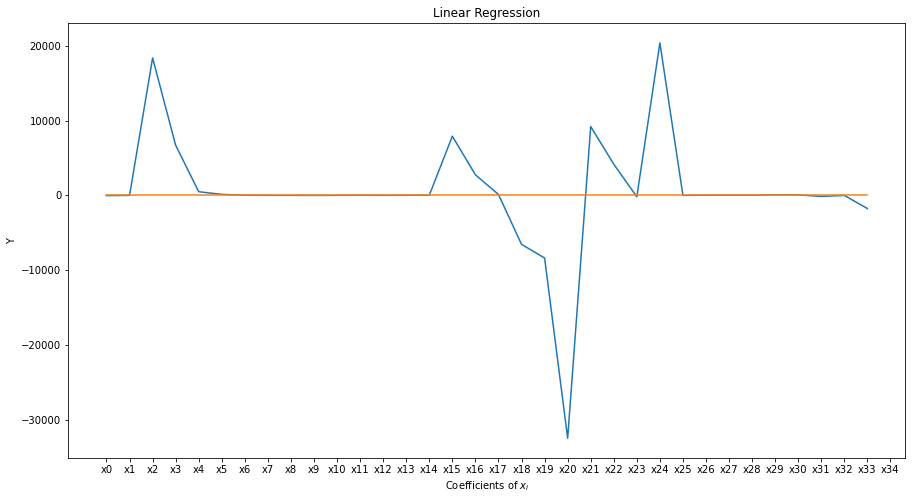

In [25]:
linear_coef = linear_model.coef_
plt.figure(figsize=(15, 8))
plt.plot(range(len(linear_coef)), linear_coef)
plt.plot(range(len(linear_coef)), [0]*len(linear_coef))
ticks = tuple(("x"+str(i) for i in range(35)))
plt.xticks(range(35),ticks)
plt.xlabel("Coefficients of $x_i$")
plt.ylabel("Y")
plt.title('Linear Regression')
plt.show()

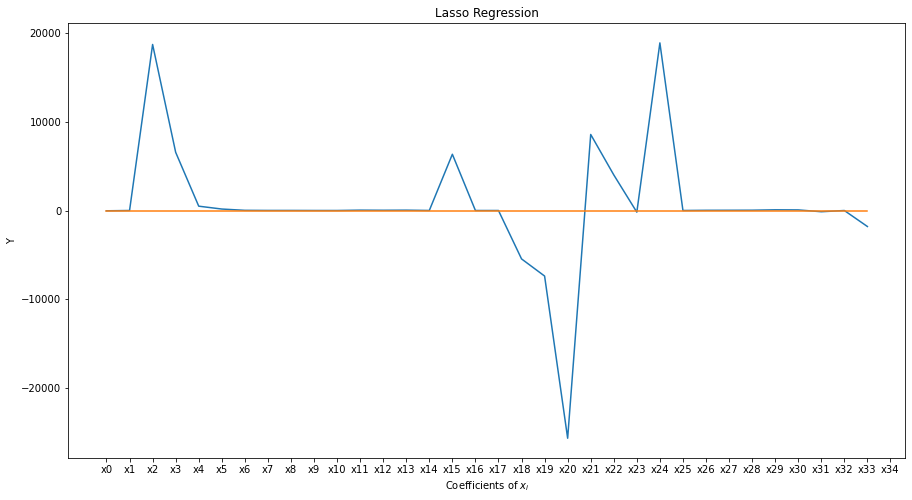

In [26]:
lasso_coef = lasso_model.coef_
plt.figure(figsize=(15, 8))
plt.plot(range(len(lasso_coef)), lasso_coef)
plt.plot(range(len(linear_coef)), [0]*len(linear_coef))
ticks = tuple(("x"+str(i) for i in range(35)))
plt.xticks(range(35),ticks)
plt.xlabel("Coefficients of $x_i$")
plt.ylabel("Y")
plt.title('Lasso Regression')
plt.show()

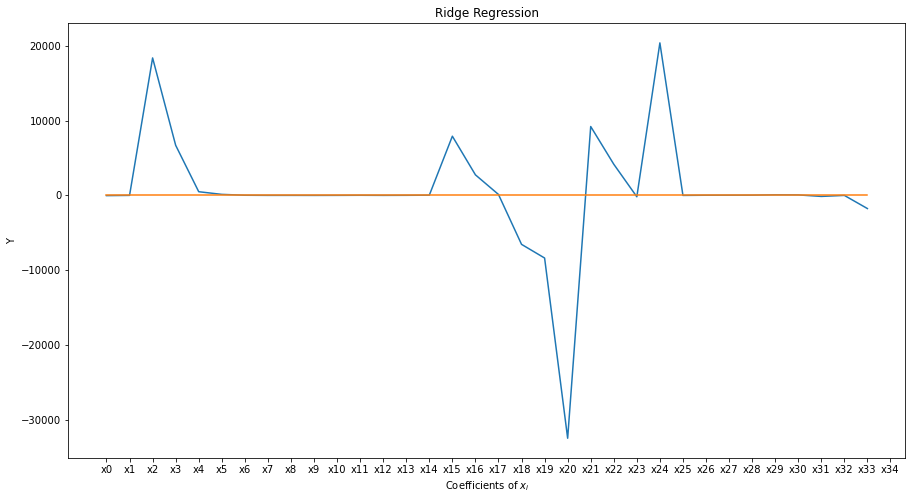

In [27]:
ridge_coef = ridge_model.coef_
plt.figure(figsize=(15, 8))
plt.plot(range(len(ridge_coef)), ridge_coef)
plt.plot(range(len(linear_coef)), [0]*len(linear_coef))
ticks = tuple(("x"+str(i) for i in range(35)))
plt.xticks(range(35),ticks)
plt.xlabel("Coefficients of $x_i$")
plt.ylabel("Y")
plt.title('Ridge Regression')
plt.show()

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

## Validation through Holdout Set
***
<br />
- Disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training.
- This is not optimal, and can cause problems – especially if the initial set of training data is small.
- One way to address this is to use cross-validation; do a sequence of fits where each subset of the data is used both as a       training set and as a validation set.

Here we do two validation trials, alternately using each half of the data as a holdout set
Accuracy scores could be combined (by, say, taking the mean) to get a better measure of the global model performance.
This particular form of cross-validation is a two-fold cross-validation
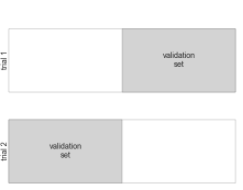

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

## Model validation through k-fold validation
***
<br />

- We could expand on this idea to use even more trials, and more folds in the data.
- Here we split the data into five groups, and use each of them in turn to evaluate the model fit on the other 4/5 of the data.
- We can use Scikit-Learn's **`cross_val_score`** convenience routine to do it succinctly

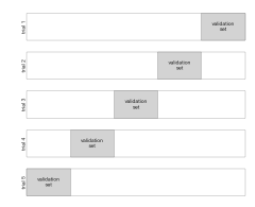

In [28]:
#code for implementing k-fold validation
## Model validation through k-fold validation from sklearn.cross_validation import cross_val_score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_model, X, y,scoring='neg_mean_squared_error',cv=5)
scores.mean()

-1401189391.5712674

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

## Hold-one-out (also known as Leave-one-out validation)
***
<br />

- In this approach, we reserve only one data-point of the available data set for testing.
- And, train model on the rest of data set. This process iterates for each data point.
- We make use of all data points, hence low bias.
- This approach leads to higher variation in testing model effectiveness because we test against one data point.
- So, our estimation gets highly influenced by the data point.
- If the data point turns out to be an outlier, it can lead to higher variation.

If we have 150 samples, the leave one out cross-validation yields scores for 150 trials,

In [29]:
#code to implement Hold-one-out validation
from sklearn.model_selection import LeaveOneOut
scores1 = cross_val_score(linear_model, X.values,y.values, scoring='neg_mean_squared_error', cv = LeaveOneOut())


print ("mean score:", scores1.mean())
print ("shape:", scores1.shape[0])
print(scores1)

mean score: -1513896811.3532808
shape: 1379
[-2.18884776e+08 -1.57372557e+08 -5.14503878e+07 ... -1.33210707e+09
 -2.12521095e+08 -9.00311247e+06]


<img src="../images/icon/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>
# In-session Recap Time
***
<br />

* Understand when does linear regression not work?
* Understand Basis Polynomial Function
* Understand L1/L2 Regression 
* Bias - Variance Trade Off
* Cross-Validation

In [30]:
# Loading the data for Mini-Challenges
df = pd.read_csv('../data/auto.csv')
mpg = df.iloc[:,0]
df.drop(['origin','mpg'],axis=1,inplace=True)
df = pd.concat([df,mpg],axis=1)
df.head()

,displ,hp,weight,accel,size,mpg
0,250.0,88,3139,14.5,15.0,18.0
1,304.0,193,4732,18.5,20.0,9.0
2,91.0,60,1800,16.4,10.0,36.1
3,250.0,98,3525,19.0,15.0,18.5
4,97.0,78,2188,15.8,10.0,34.3


<img src="../images/icon/ppt-icons.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Mini Challenge - 1
***
Perform a Hold-Out cross-validation by splitting the data into train and test with `random_state=9` and `test_size = 0.2`

<img src="../images/icon/ppt-icons.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Mini Challenge - 2
***
Fit a Linear Regression model on the validated dataset above and find the mean squared error for linear regression.

<img src="../images/icon/ppt-icons.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Mini Challenge - 3
***

Fit a Lasso model on the same validated dataset having `alpha=140`, `max_iter=100000`, `random_state=9`

<img src="../images/icon/ppt-icons.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Mini Challenge - 4
***
Fit a Ridge model having `alpha=0.00001`, `max_iter=100000`, `random_state=9`

<img src="../images/icon/ppt-icons.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Mini Challenge - 5
***
Perform a k-fold cross validation with parameter `cv=5` and model as linear regression and scoring parameter as neg_mean_squared_error.


# Thank You
***
### Coming up next...
***
- Scaling, Centering, Skewness 
- Basic data cleaning and Preprocessing
- Feature extraction and Feature engineering

For more queries - Reach out to www.vikas-ai.com